### TASK 11- Prediction task is to determine whether a person makes over 50K a year
**BY: SAHANA HEGDE**

### ◘ What is it about?
The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc.. ... — Scaling Up The Accuracy Of Naive-bayes Classifiers: A Decision-tree Hybrid, 1996. There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

‘>50K’: majority class, approximately 25%. ‘<=50K’: minority class, approximately 75%. Given that the class imbalance is not severe and that both class labels are equally important, it is common to use classification accuracy or classification error to report model performance on this dataset.

Next, let’s take a closer look at the data.

The Dataset
The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

--->**age** : the age of an individual

Integer greater than 0

---> **workclass** : a general term to represent the employment status of an individual

Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

---> **fnlwgt** : final weight. In other words, this is the number of people the census believesthe entry represents

Integer greater than 0

---> **education** : the highest level of education achieved by an individual.

Bachelors, Some-college,11th, HS-grad,Prof-school,Assoc-acdm,Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

---> **educationnum** : the highest level of education achieved in numerical form.

Integer greater than 0

---> **maritalstatus** : marital status of an individual. Married-civ-spouse corresponds to acivilian spouse while Married-AF-spouse is a spouse in the Armed Forces.


Married-civ-spouse,Divorced, Never-married,Separated, Widowed,Married-spouse-absent,Married-AF-spouse.

---> **occupation** : the general type of occupation of an individual

Tech-support,Craft-repair,Other-service,Sales, Exec-managerial,Prof-specialty,Handler-scleaners,Machin-eop-inspct,Adm-clerical,Farming-fishing,Transport-moving, Priv-house-serv,Protective-serv,Armed-Forces.
relationship : represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all

Wife, Own-child,Husband, Not-in-family,Other-relative,Unmarried.

---> **race** : Descriptions of an individual’s race

White, Asian-Pac-Islander,Amer-Indian-Eskimo,Other, Black.

---> **sex** : the biological sex of the individual

Male, Female

---> **capitalgain** : capital gains for an individual

Integer greater than or equal to 0

---> **capitalloss** : capital loss for an individual

Integer greater than or equal to 0

---> **hoursperweek** : the hours an individual has reported to work per week

continuous.

---> **nativecountry** : country of origin for an individual

United-States,Cambodia, England, Puerto-Rico,Canada, Germany,Outlyin-gUS(Guam-USVI-etc), india, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
---> income : whether or not an individual makes more than $50,000 annually.

<=50k, >50k

In [99]:
# Importing the required libraries

# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Removing Warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [2]:
df= pd.read_csv('adult.csv')

In [5]:
df.head(10) #first 10 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.shape #finding the shape of data.

(48842, 15)

In [6]:
df.info() #information about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.describe() #description about the dataset

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Analyze the data and classify them

In [10]:
#printing the total '?' present in each rows
print('The total numbers of ? present in each row')
print(df.isin(['?']).sum())
print()
print('The mean of ? present in each row')
print(round(df.isin(['?']).mean()*100,2) )

The total numbers of ? present in each row
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

The mean of ? present in each row
age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64


In [11]:
#replacing ? with nan values
df.replace('?', np.nan , inplace=True)

In [12]:
df.isnull().sum() #sum of all null values

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

To drop the null records as some of null records, just a few percent of data is null!

In [13]:
df.shape

(48842, 15)

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(45222, 15)

In [16]:
(48842 - 45222) * 100 / 48842

7.411653904426518

**7.41% of data losses after droping the null records!!**

In [17]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


In [18]:
df.drop('education', axis=1, inplace=True)

In [19]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
cat_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [21]:
num_cols

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [22]:
cat_cols

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...
48837,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


**we have to conver categorical values to numerical valuse in data set**

**To Understand the probability and frequency distribution of each numerical column**

### UNIVARIATE ANALYSIS

In [25]:
# to conver categorical to numaric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [26]:
cat_cols.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [27]:
cat_cols.workclass.value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [28]:
cat_cols['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [29]:
cat_cols['marital-status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [30]:
cat_cols.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [31]:
cat_cols.occupation.value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [32]:
df = df.loc[df['native-country'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [33]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A80FE487C0>,
      dtype=object)

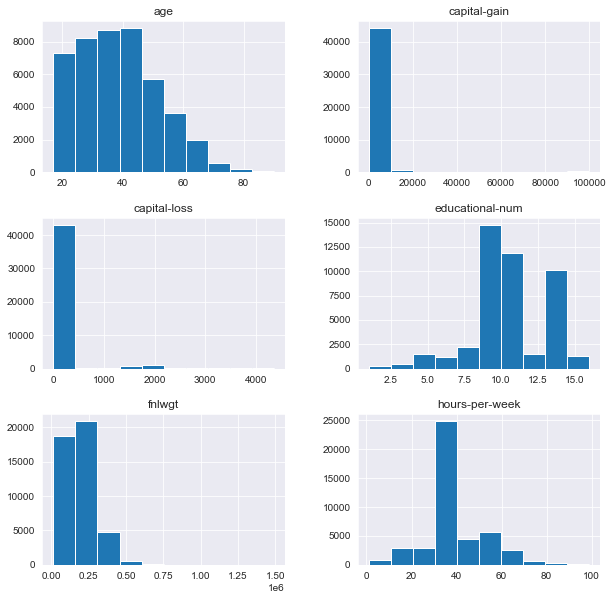

In [34]:
num_attributes.hist(figsize=(10,10))

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


In [36]:
df_num = df.select_dtypes(exclude='object')
print(df_num.columns)
print()
print(df_num.head())

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
5   34  198693                6             0             0              30


In [37]:
df_num.drop(['fnlwgt'], axis=1, inplace=True)

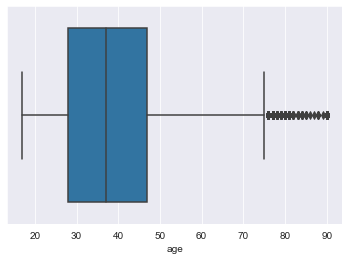

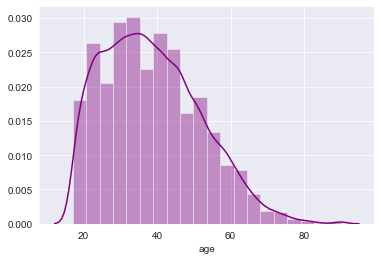

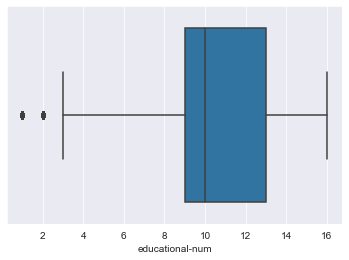

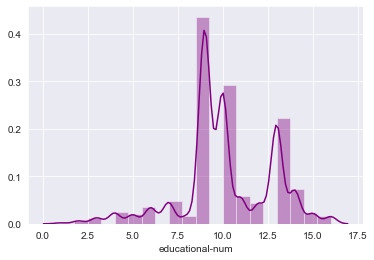

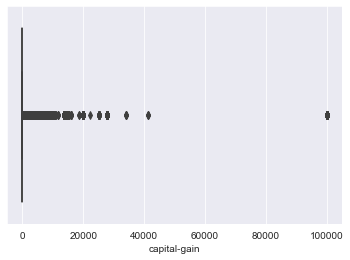

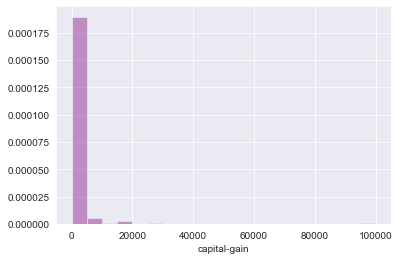

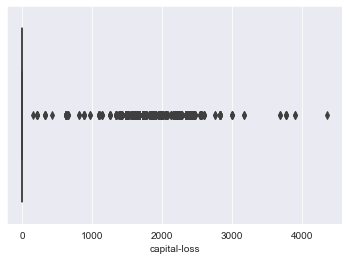

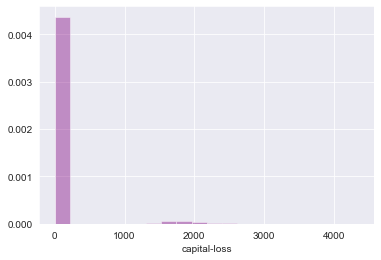

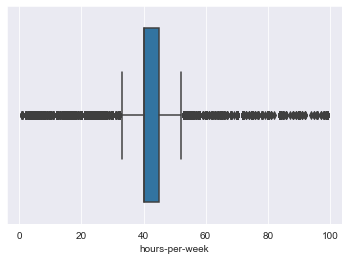

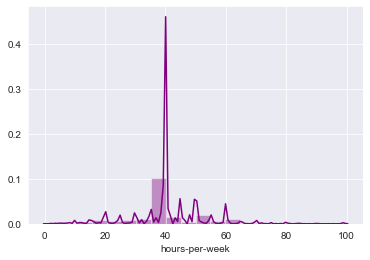

In [38]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()
    sns.distplot(df_num[i], bins= 20, color='purple')
    plt.show()

Box Plot: It is a type of chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data. It makes comparing characteristics of data between categories very easy.

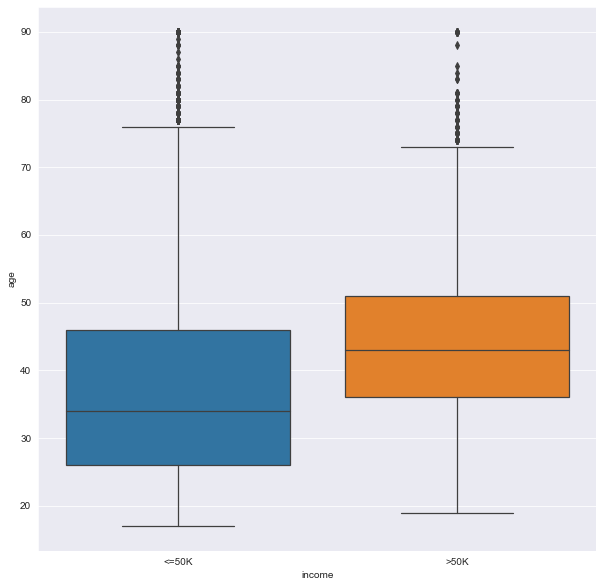

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df["age"],x=df["income"],width=0.8,linewidth=1.25)

In income, we can see we have many values which are extremely high. These are called outliers. Boxplot helps to identify the outliers. And it also tells the mean, median, IQR.

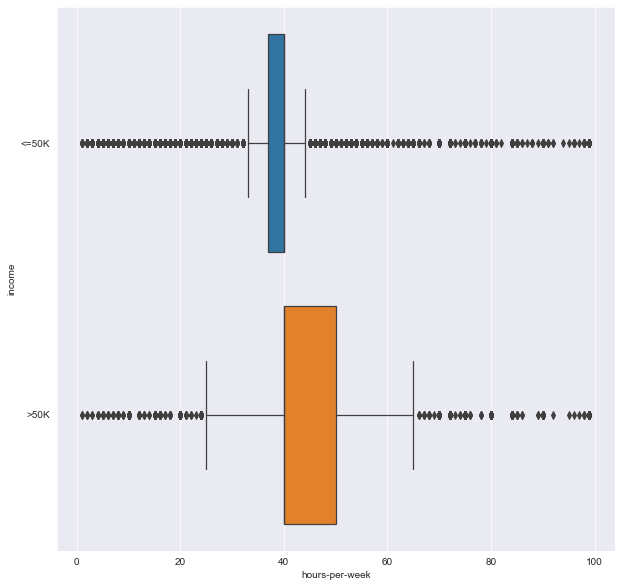

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df["hours-per-week"],y=df["income"],width=0.8,linewidth=1.25)

Displot It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

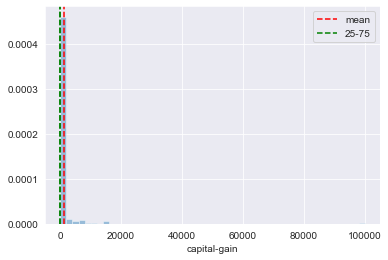

In [41]:
sns.distplot(df["capital-gain"])
plt.axvline(x=np.mean(df["capital-gain"]),c="red",ls="--",label="mean")
plt.axvline(x=np.percentile(df["capital-gain"],25),c="green",ls="--",label="25-75")
plt.axvline(x=np.percentile(df["capital-gain"],75),c="green",ls="--")
plt.legend()

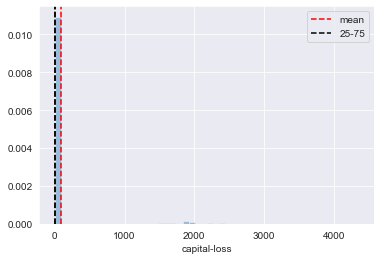

In [42]:
sns.distplot(df["capital-loss"])
plt.axvline(x=np.mean(df["capital-loss"]),c="red",ls="--",label="mean")
plt.axvline(x=np.percentile(df["capital-loss"],25),c="black",ls="--",label="25-75")
plt.axvline(x=np.percentile(df["capital-loss"],75),c="black",ls="--")
plt.legend()

### --> Histograms- A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A812304F40>,
      dtype=object)

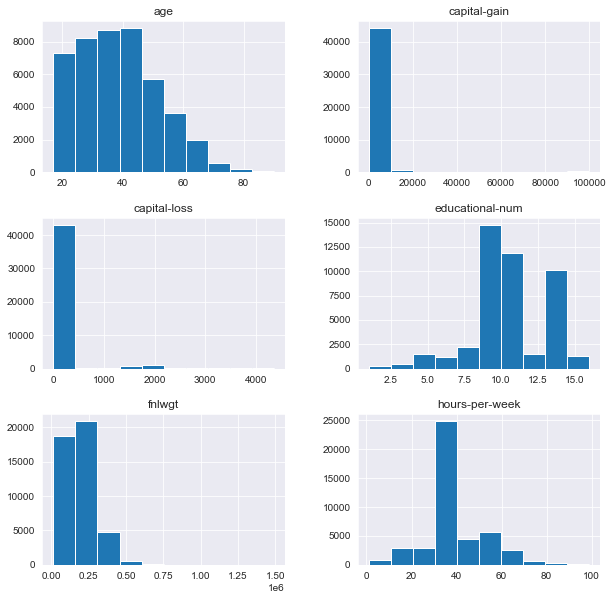

In [43]:
df.hist(figsize=(10,10),bins=10)

### Pandas Crosstab: This method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [44]:
pd.crosstab(df["age"], df["income"])

income,<=50K,>50K
age,,
17,493,0
18,695,0
19,862,2
20,915,1
21,929,6
...,...,...
86,1,0
87,1,0
88,4,1


In [45]:
pd.crosstab( df["income"], df["capital-gain"])

capital-gain,0,114,401,594,914,991,1055,1086,1151,1173,...,15831,18481,20051,22040,25124,25236,27828,34095,41310,99999
income,,,,,,,,,,,,,,,,,,,,,
<=50K,32599,8,2,42,10,4,31,5,13,2,...,0,0,0,1,0,0,0,4,3,0
>50K,8833,0,0,0,0,0,0,0,0,0,...,8,2,44,0,4,14,56,0,0,229


In [46]:
pd.crosstab(df["income"],df["capital-loss"])

capital-loss,0,155,213,323,419,625,653,810,880,974,...,2559,2603,2754,2824,3004,3175,3683,3770,3900,4356
income,,,,,,,,,,,,,,,,,,,,,
<=50K,32972,1,5,5,1,17,2,2,6,2,...,0,5,2,0,0,2,1,4,2,1
>50K,10110,0,0,0,0,0,2,0,0,0,...,17,0,0,12,4,0,1,0,0,0


**Countplot**: seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

If we use only one data variable instead of two data variables then it means that the axis denotes each of these data variables as an axis.

X denotes an x-axis and y denote a y-axis.

In [47]:
df['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

Text(0.5, 1.0, 'working workclass of employees ')

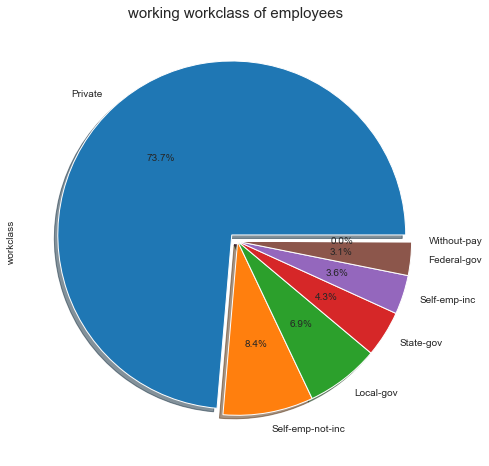

In [48]:
plt.figure(figsize=(10,8))
cat=df['workclass'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.05, 0, 0, 0, 0, 0, 0))
plt.title('working workclass of employees ', fontsize=15)

In [49]:
df.nunique()

age                   74
workclass              7
fnlwgt             26741
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         121
capital-loss          97
hours-per-week        96
native-country        41
income                 2
dtype: int64

Text(0.5, 1.0, 'marital-status of employees ')

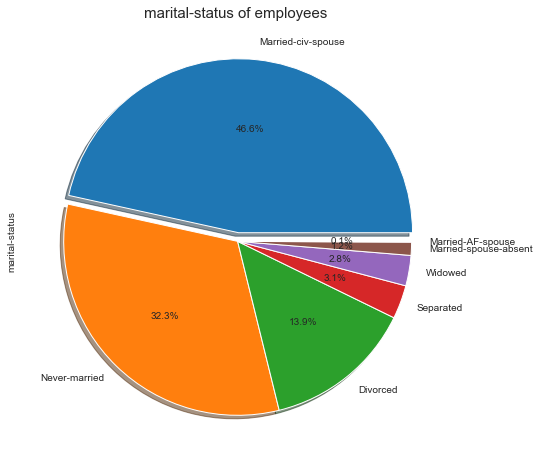

In [50]:
plt.figure(figsize=(8,8))
cat=df['marital-status'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.05, 0, 0, 0, 0, 0, 0))
plt.title('marital-status of employees ', fontsize=15)

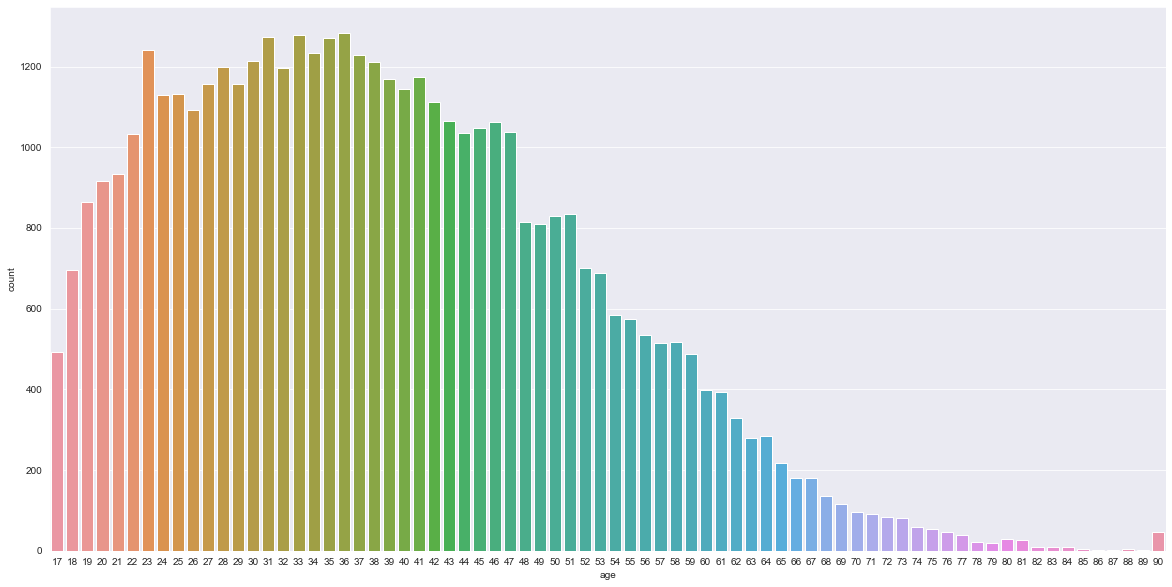

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])

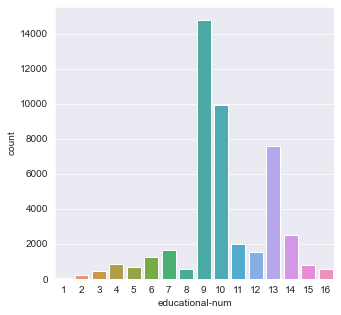

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['educational-num'])

observation: Bascially the 9th,10th & 13th standard are more in dataset compartive to others

### Bivariate analysis

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

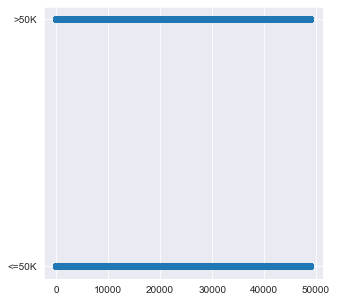

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df['income'])

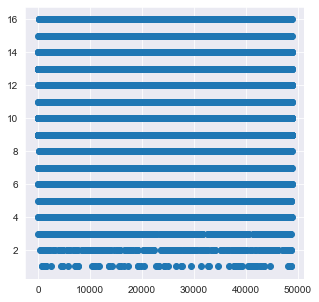

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df['educational-num'])

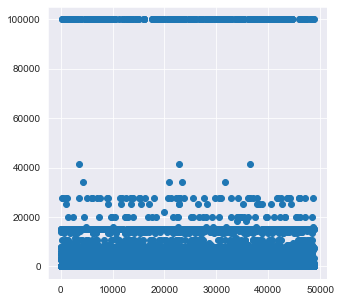

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df["capital-gain"])

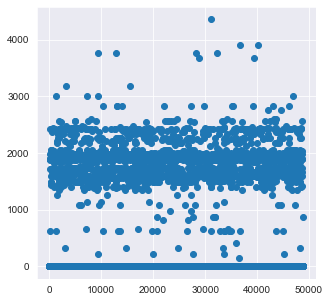

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df["capital-loss"])

Pair Plot: To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

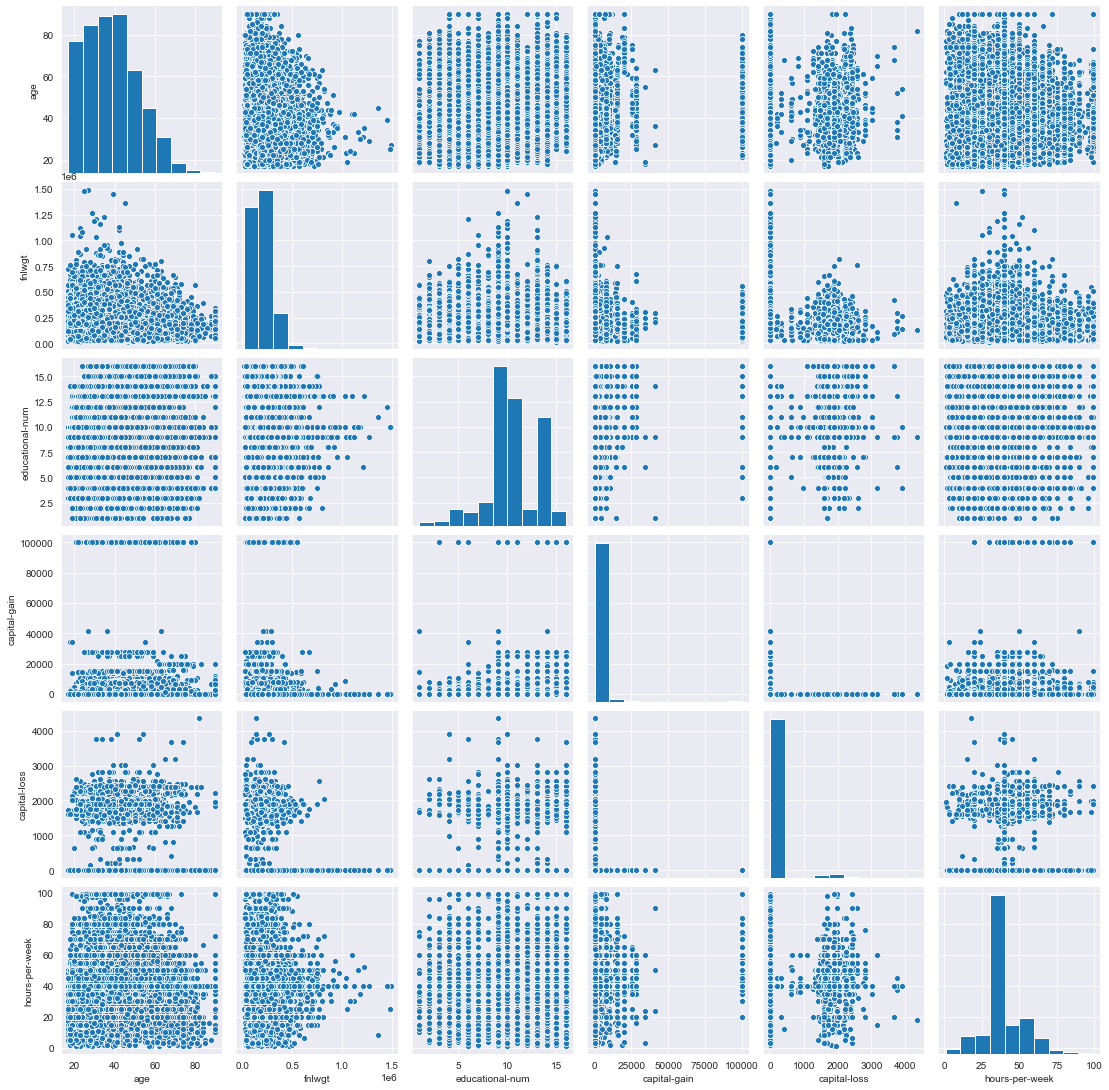

In [57]:
data1 = df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
sns.pairplot(data1)

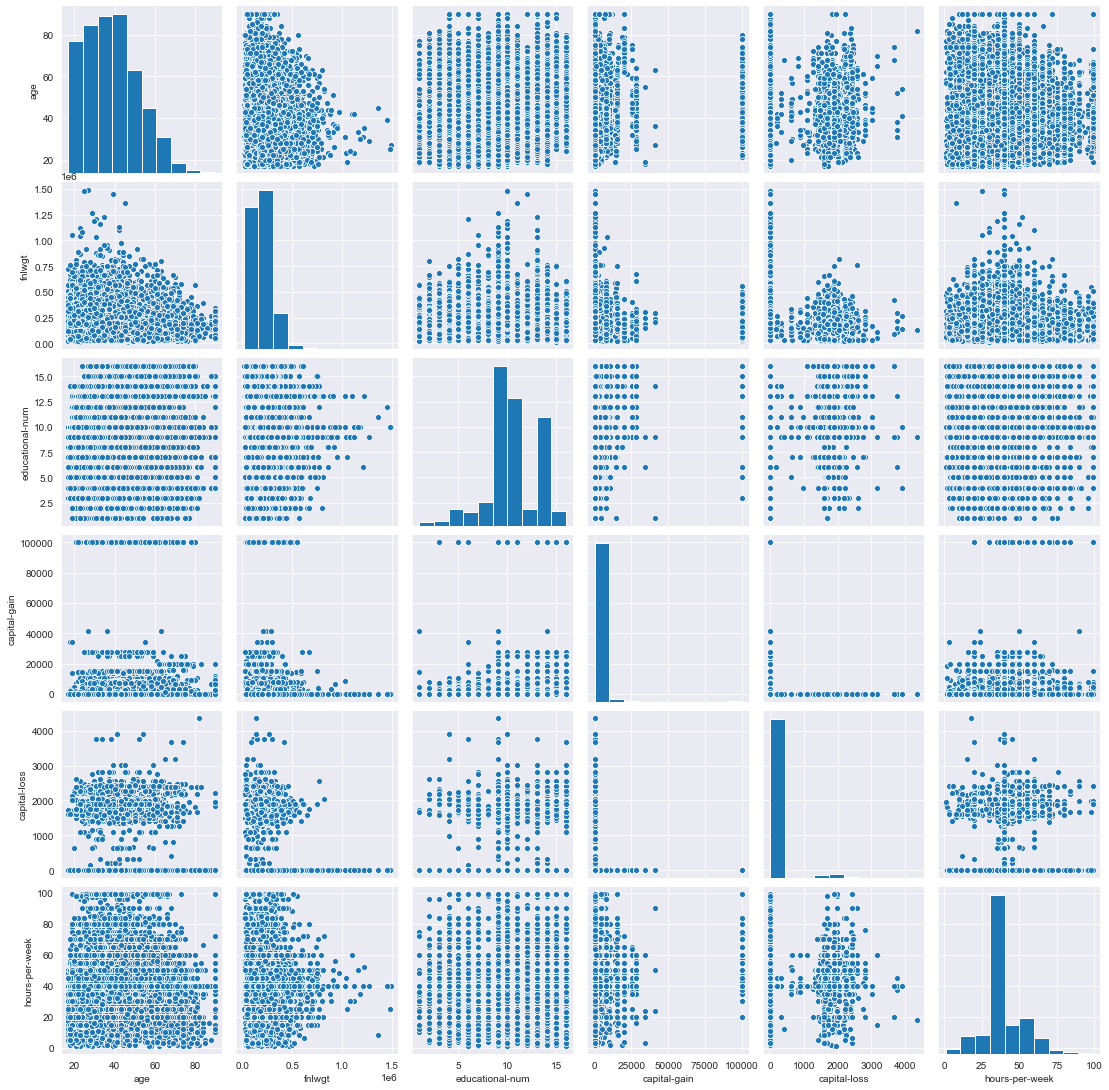

In [58]:
sns.pairplot(df)

Text(0, 0.5, 'capital-gain')

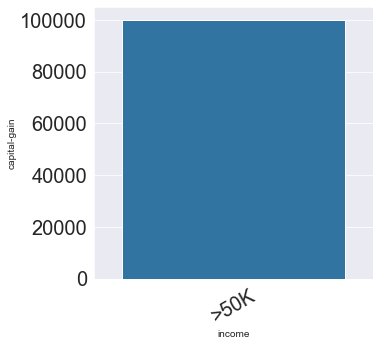

In [59]:
plt.figure(figsize=(5, 5))
data1 = df.sort_values(by=['capital-gain'], ascending=False)
sns.barplot(x='income', y='capital-gain', data=data1[:200])
plt.xticks(fontsize=20)
plt.xticks(rotation=30)
plt.yticks(fontsize=20)
plt.xlabel('income', fontsize= 10)
plt.ylabel('capital-gain', fontsize = 10)

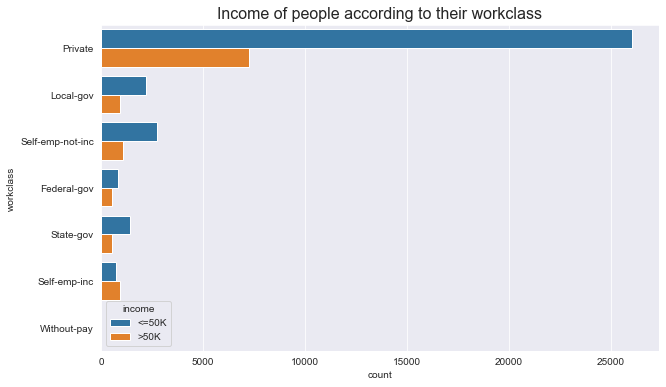

In [60]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = df['workclass'], hue = df['income'])
plt.show()

#### We see that the majority of people who have income more than 50K a year are from private sector.

In [62]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


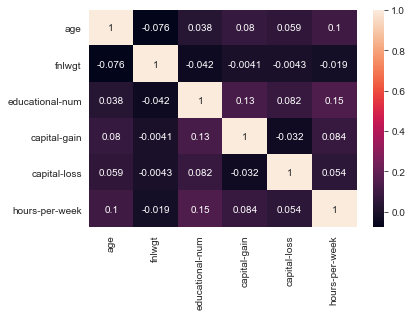

In [63]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [64]:
df.duplicated().sum()

47

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [67]:
print(df.dtypes)

age                 int64
workclass          object
fnlwgt              int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


**HYPOTHESIS TESTING**

In [69]:
# z_score for sampling distributions
def z_score(sample_size, sample_mean, pop_mean, pop_std):
 numerator = sample_mean - pop_mean
 denomenator = pop_std / sample_size**0.5
 return numerator / denomenator

In [70]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [71]:
df1 = df[(df['occupation']=='Tech-support') | (df['occupation']=='Armed-Forces') | (df['occupation']=='Machine-op-inspct') | (df['occupation']=='Sales')]
df2 = df1[['capital-gain']]

In [72]:
df2.shape[0]

9803

In [73]:
samples = random.sample(range(0, df2.shape[0]), 100)
sample_mean = df2.iloc[samples, 0].mean()
print(sample_mean)

1746.13


In [74]:
std = df['capital-gain'].std()
print(std)

7510.2498762836085


In [75]:
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [76]:
# Left Tail - Calculating the z-critical value
confidence_level = 0.97
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha) # Left tailed Z score for 95% Confidence Level
print(z_critical)

1.8807936081512509


In [77]:
df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [78]:
# Defining the sample and population parameters
sample_size = 100
sample_mean = sample_mean
pop_mean = df2['capital-gain'].mean()
pop_std = std
print(pop_mean)

889.8456594919923


In [79]:
# Calculating the z-score
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

1.140154261993389


Text(1746.13, 0.0007, 'x_bar')

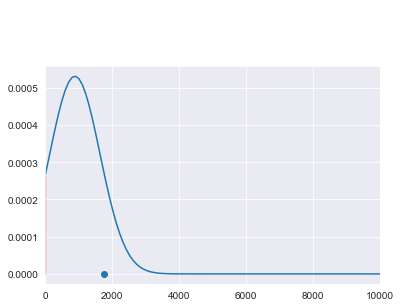

In [80]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 0
x_max = 10000
# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
# Computing the left critical value (left tailed Test)
z_critical_left = pop_mean - (z_critical * std)
# Shading the left rejection region
x2 = np.linspace(x_min, z_critical_left, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')
# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [81]:
if(np.abs(z) > z_critical):
 print("Reject Null Hypothesis")
else:
 print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [82]:
# Conclusion using p test
p_value = 2 * (1.0 - norm.cdf(np.abs(z)))
print("p_value = ", p_value)
if(p_value < alpha):
 print("Reject Null Hypothesis")
else:
 print("Fail to reject Null Hypothesis")

p_value =  0.25422203882669603
Fail to reject Null Hypothesis


Conclusion - After hypothesis testing we can see that people who are at the post of Tech-support or Armed-Forces or Machine-op-inspct or sales are getting bettter capital gain.

Text(0.5, 0, 'occupation')

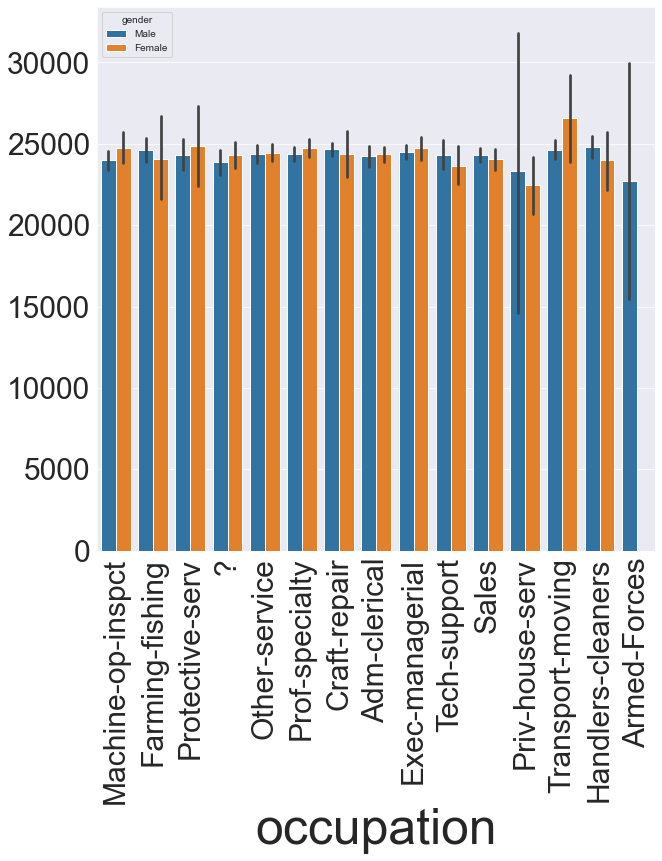

In [83]:
plt.figure(figsize=(10, 10))
sns.barplot(x='occupation', y=df.index, data=df, hue='gender')
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
plt.xlabel('occupation', fontsize= 50)

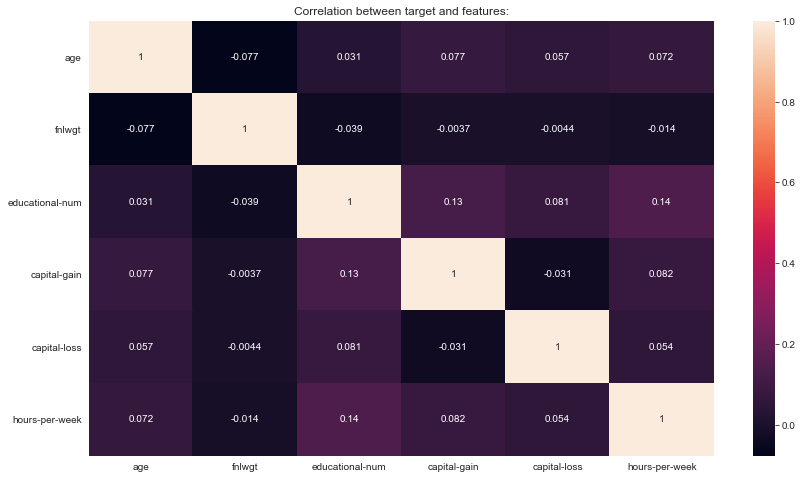

In [84]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(df.corr(), annot = True)
plt.show()

### Preparing the data for modeling!!



In [102]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
            'Never-married','Separated','Widowed'],
            ['not married','married','married','married','not married','not married','not married'], 
            inplace = True)

df.replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov','State-gov',
                'Without-pay', 'Never-worked'],
                ['Private','inc','inc','gov','gov','gov','Without-pay','Never-worked'], 
                inplace = True)

df.replace(['<=50K','>50K'],[0,1], inplace=True)

In [103]:
df_cat = df.select_dtypes(include='object')

In [104]:
for i in df_cat.columns:
    print(i)
    print('_'*20)
    print('The number of unique element present : {}'.format(df_cat[i].nunique()))
    print()
    print('The counts of each element are \n{}'.format(df_cat[i].value_counts()))
    print()

workclass
____________________
The number of unique element present : 6

The counts of each element are 
Private         33906
gov              6549
inc              5557
?                2799
Without-pay        21
Never-worked       10
Name: workclass, dtype: int64

education
____________________
The number of unique element present : 16

The counts of each element are 
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

marital-status
____________________
The number of unique element present : 2

The counts of each element are 
not married    25798
married        23044
Name: marital-status, dtype: int64

occupation
____________________
The number of unique el

In [105]:
from sklearn.preprocessing import LabelEncoder
scaler_label=LabelEncoder()
df_cat_label=df_cat.apply(LabelEncoder().fit_transform)

df_cat_label.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,2,1,1,7,3,2,1,39
1,2,11,0,5,0,4,1,39
2,4,7,0,11,0,4,1,39
3,2,15,0,7,0,2,1,39
4,0,15,1,0,3,4,0,39


In [106]:

df_num = df.select_dtypes(exclude='object')

In [107]:
df1=pd.concat([df_cat_label,df_num], axis=1, join='inner')

In [108]:
df1.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,2,1,1,7,3,2,1,39,25,226802,7,0,0,40,0
1,2,11,0,5,0,4,1,39,38,89814,9,0,0,50,0
2,4,7,0,11,0,4,1,39,28,336951,12,0,0,40,1
3,2,15,0,7,0,2,1,39,44,160323,10,7688,0,40,1
4,0,15,1,0,3,4,0,39,18,103497,10,0,0,30,0


In [109]:
df1.shape

(48842, 15)

In [110]:
df1.drop(['fnlwgt'], axis=1, inplace=True)

In [111]:
df1.isnull().sum()

workclass          0
education          0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
native-country     0
age                0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [112]:
x=df1.drop(['income'], axis=1)
y=df1.income

In [113]:
x[:5]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,2,1,1,7,3,2,1,39,25,7,0,0,40
1,2,11,0,5,0,4,1,39,38,9,0,0,50
2,4,7,0,11,0,4,1,39,28,12,0,0,40
3,2,15,0,7,0,2,1,39,44,10,7688,0,40
4,0,15,1,0,3,4,0,39,18,10,0,0,30


In [114]:
y[:5]

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [115]:
from sklearn.preprocessing import Normalizer
n=Normalizer()
df=n.fit_transform(x)

In [116]:
df[:5]

array([[3.21744726e-02, 1.60872363e-02, 1.60872363e-02, 1.12610654e-01,
        4.82617089e-02, 3.21744726e-02, 1.60872363e-02, 6.27402216e-01,
        4.02180908e-01, 1.12610654e-01, 0.00000000e+00, 0.00000000e+00,
        6.43489452e-01],
       [2.64604901e-02, 1.45532695e-01, 0.00000000e+00, 6.61512252e-02,
        0.00000000e+00, 5.29209802e-02, 1.32302450e-02, 5.15979557e-01,
        5.02749312e-01, 1.19072205e-01, 0.00000000e+00, 0.00000000e+00,
        6.61512252e-01],
       [6.13427672e-02, 1.07349843e-01, 0.00000000e+00, 1.68692610e-01,
        0.00000000e+00, 6.13427672e-02, 1.53356918e-02, 5.98091980e-01,
        4.29399370e-01, 1.84028302e-01, 0.00000000e+00, 0.00000000e+00,
        6.13427672e-01],
       [2.60133711e-04, 1.95100283e-03, 0.00000000e+00, 9.10467987e-04,
        0.00000000e+00, 2.60133711e-04, 1.30066855e-04, 5.07260736e-03,
        5.72294163e-03, 1.30066855e-03, 9.99953984e-01, 0.00000000e+00,
        5.20267421e-03],
       [0.00000000e+00, 2.69581933e-

In [120]:
X=pd.DataFrame(data=df , columns=x.columns)
X.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.032174,0.016087,0.016087,0.112611,0.048262,0.032174,0.016087,0.627402,0.402181,0.112611,0.000000,0.0,0.643489
1,0.026460,0.145533,0.000000,0.066151,0.000000,0.052921,0.013230,0.515980,0.502749,0.119072,0.000000,0.0,0.661512
2,0.061343,0.107350,0.000000,0.168693,0.000000,0.061343,0.015336,0.598092,0.429399,0.184028,0.000000,0.0,0.613428
3,0.000260,0.001951,0.000000,0.000910,0.000000,0.000260,0.000130,0.005073,0.005723,0.001301,0.999954,0.0,0.005203
4,0.000000,0.269582,0.017972,0.000000,0.053916,0.071889,0.000000,0.700913,0.323498,0.179721,0.000000,0.0,0.539164


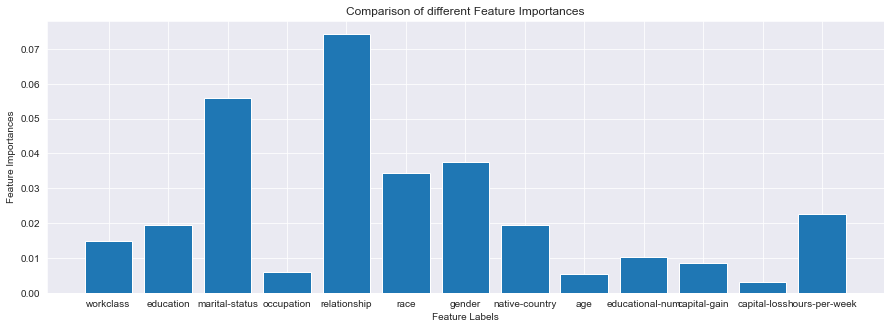

In [121]:
#features selection. 
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(15,5))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [123]:
df2= {
    "column_name" : X.columns,
    "features_score" : feature_importance_normalized

}

df_new=pd.DataFrame(df2)
df_new

,column_name,features_score
0,workclass,0.014818
1,education,0.019340
2,marital-status,0.055996
3,occupation,0.005890
4,relationship,0.074313
5,race,0.034376
6,gender,0.037645
7,native-country,0.019332
8,age,0.005276
9,educational-num,0.010197


In [124]:
df_new_feature=df_new[df_new['features_score'] > 0.01]
df_new_feature

,column_name,features_score
0,workclass,0.014818
1,education,0.019340
2,marital-status,0.055996
4,relationship,0.074313
5,race,0.034376
6,gender,0.037645
7,native-country,0.019332
9,educational-num,0.010197
12,hours-per-week,0.022610


In [125]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 13), (9769, 13), (39073,), (9769,))

0.7814515303511107


[[7020  400]
 [1735  614]]


              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7420
           1       0.61      0.26      0.37      2349

    accuracy                           0.78      9769
   macro avg       0.70      0.60      0.62      9769
weighted avg       0.75      0.78      0.75      9769





Text(34.0, 0.5, 'Predicted')

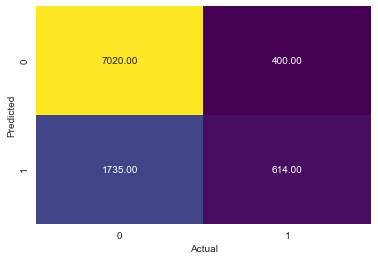

In [127]:
# applying logistic regression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression()
clf_logit.fit(X_train, y_train)
#predict 
y_test_pred = clf_logit.predict(X_test)
#accuracy 
from sklearn import metrics
LR_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))
print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="viridis")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [128]:
#Logistic regression using cv
import numpy as np
from sklearn.model_selection import cross_val_score
score=cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
print(score)
print('the average score is : {}'. format(np.mean(score)))

[0.77942682 0.7814739  0.77302968 0.77860251 0.78474533 0.77732275
 0.78525723 0.7775787  0.77962631 0.78039416]
the average score is : 0.7797457401996627


[20:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8631384993346299


[[6949  471]
 [ 866 1483]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7420
           1       0.76      0.63      0.69      2349

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769





Text(34.0, 0.5, 'Predicted')

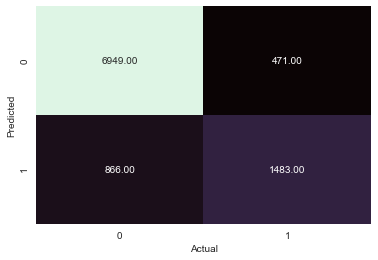

In [132]:
#XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#predict 
y_test_pred = model.predict(X_test)
#accuracy 
from sklearn import metrics
XGB_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [133]:
#XGBClassifier using cv
import numpy as np
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGBClassifier(), X_train, y_train, cv=5)
print(score)
print('the average score is : {}'. format(np.mean(score)))

[20:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Decision Tree Classifier

In [134]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtr=DecisionTreeClassifier()

In [136]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
Predictions = dtr.predict(X_train)
metrics.accuracy_score(y_train,Predictions)

0.9715404499270596

In [138]:
Predictions1 = dtr.predict(X_test)

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test, Predictions1)*100)
print("Precision:",metrics.precision_score(y_test, Predictions1))
print("Recall:",metrics.recall_score(y_test, Predictions1))

Accuracy: 82.2806837956802
Precision: 0.6367256637168142
Recall: 0.6126011068539804


### K Nearest Neighbour

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [143]:
pred_knn = knn.predict(X_train)
metrics.accuracy_score(y_train,pred_knn)

0.8753359097074707

In [146]:
pred_knn1 = knn.predict(X_test)

In [145]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_knn1))
print("Precision:",metrics.precision_score(y_test, pred_knn1))
print("Recall:",metrics.recall_score(y_test,pred_knn1))

Accuracy: 0.8230115672023749
Precision: 0.6474785918173168
Recall: 0.5793954874414644


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

0.8558706111167981


[[7172  248]
 [1160 1189]]


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7420
           1       0.83      0.51      0.63      2349

    accuracy                           0.86      9769
   macro avg       0.84      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769



No : ROC AUC=0.500
rfc1: ROC AUC=0.911


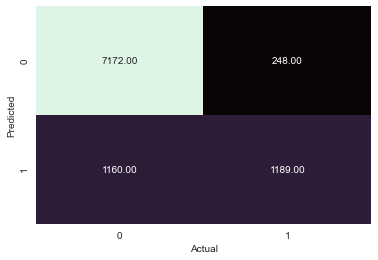

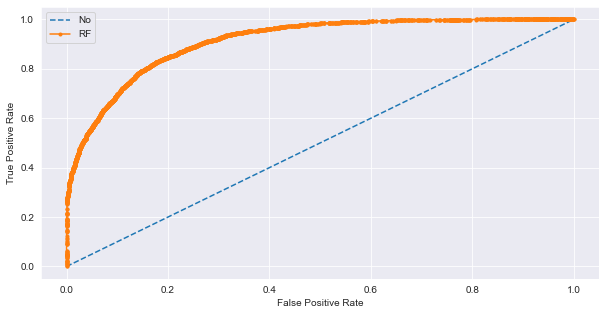

In [157]:
rfc1=RandomForestClassifier(random_state=42,
                            max_features='sqrt',
                            n_estimators= 100,
                            max_depth=8, 
                            criterion='gini')

rfc1.fit(X_train, y_train)


#predict 
y_test_pred = rfc1.predict(X_test)
#accuracy 
from sklearn import metrics
RF_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob=[0 for i in range(len(y_test))]
#predicting the probality
rfc1_prob=rfc1.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc1_prob = rfc1_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
rfc1_auc = roc_auc_score(y_test, rfc1_prob)

# summarize scores
print('No : ROC AUC=%.3f' % (ns_auc))
print('rfc1: ROC AUC=%.3f' % (rfc1_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
rfc1_fpr, rfc1_tpr, _ = roc_curve(y_test, rfc1_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No')
plt.plot(rfc1_fpr, rfc1_tpr, marker='.',label='RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [159]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [160]:
rfc_pred = rfc.predict(X_train)
metrics.accuracy_score(y_train,rfc_pred)

0.9705679113454303

In [161]:
rfc_pred1 = rfc.predict(X_test)

In [162]:
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred1))
print("Precision:",metrics.precision_score(y_test, rfc_pred1))
print("Recall:",metrics.recall_score(y_test, rfc_pred1))

Accuracy: 0.8509571092230526
Precision: 0.7238095238095238
Recall: 0.6147296722009365


### KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(knn.score(X_test,y_test))

[[6369 1051]
 [ 955 1394]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7420
           1       0.57      0.59      0.58      2349

    accuracy                           0.79      9769
   macro avg       0.72      0.73      0.72      9769
weighted avg       0.80      0.79      0.80      9769

0.7946565666905517


Text(0, 0.5, 'Error Rate')

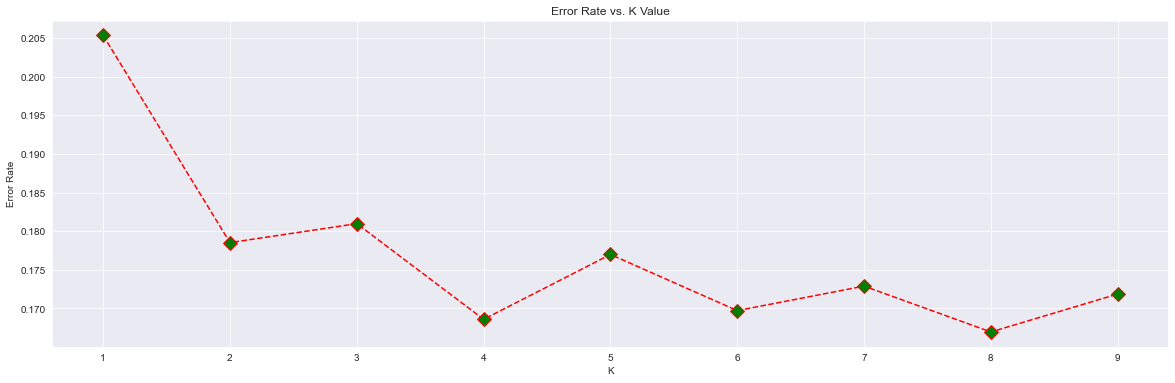

In [164]:
KNN_error_rate = []
import numpy as np
# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    KNN_error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,6))
plt.plot(range(1,10),KNN_error_rate,color='red', linestyle='dashed', marker='D',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

[[6943  477]
 [1181 1168]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7420
           1       0.71      0.50      0.58      2349

    accuracy                           0.83      9769
   macro avg       0.78      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769

0.8302794554202068
No Skill: ROC AUC=0.500
KNN: ROC AUC=0.851


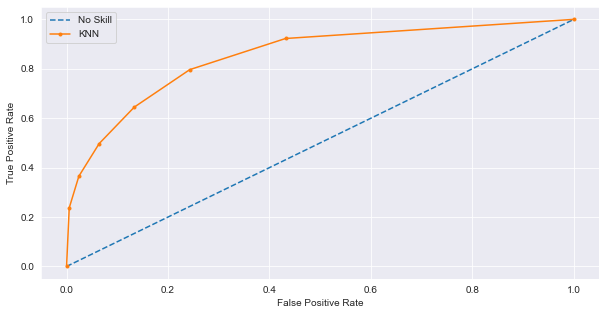

In [166]:

#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
KNN_score=metrics.accuracy_score(y_test, y_test_pred)
print(knn.score(X_test,y_test))
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob=[0 for i in range(len(y_test))]
#predicting the probality
knn_prob=knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_prob = knn_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
knn_auc = roc_auc_score(y_test, knn_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### AdaBoost Classifier

In [169]:
from sklearn.ensemble import AdaBoostClassifier

In [170]:
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train,y_train)

AdaBoostClassifier()

In [171]:
AdaBoost.score(X_train, y_train)

0.8421416323292299

In [172]:
pred_Adaboost = AdaBoost.predict(X_train)
metrics.accuracy_score(y_train,pred_Adaboost)

0.8421416323292299

In [173]:
pred_Adaboost1 = AdaBoost.predict(X_test)

### Gradient Boosting Classifier

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [180]:
GBC.score(X_train, y_train)

0.8623090113377524

In [181]:
pred_gradient1 = GBC.predict(X_test)

In [182]:
print("Accuracy:",metrics.accuracy_score(y_test,pred_gradient1))
print("Precision:",metrics.precision_score(y_test, pred_gradient1))
print("Recall:",metrics.recall_score(y_test,pred_gradient1))

Accuracy: 0.8575084450813799
Precision: 0.7829686575990538
Recall: 0.5636441038739889


### XgBoost Classifier

In [183]:
from xgboost import XGBClassifier

In [184]:
model_xg = XGBClassifier()
model_xg.fit(X_train,y_train)

[20:39:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
pred_xg = model_xg.predict(X_train)
metrics.accuracy_score(y_train,pred_xg)

0.9048959639648863

In [186]:
pred_xg1 = model_xg.predict(X_test)

In [187]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_xg1))
print("Precision:",metrics.precision_score(y_test, pred_xg1))
print("Recall:",metrics.recall_score(y_test,pred_xg1))

Accuracy: 0.8631384993346299
Precision: 0.7589559877175026
Recall: 0.6313324819071946


#### for class : 1(>50k)

In [191]:

print('Precision = ', 2229/(2229+806))

Precision =  0.7344316309719934


In [192]:
print('Recall= ', 2229/(2229+1286))

Recall=  0.6341394025604552


### Summary


-> 6 different classifier models are used to predict the income attributes.

-> The first model is Logistic Regression.

-> It gives an accuracy of 83 percentage and also performing good.

-> The next model is Support Vector Machine.

->It gives an high accuracy of 83.95 percentage, a very good performing model.

->The next model is Random Forest Classifier.

->It gives an accuracy of 82.5 percentage, performing resonably good.

->The next model is Naive Bayes.

->It gives an accuracy of only 79 percentage.

->The next model is Decision Tree classifier.

->It gives an accuracy of only 78 percentage.

->Our Last and final model is Neural networks.

->It gives an High accuracy of 83.94 percentage comparing to other working models.

->From the table, It is clear that SVM and Neural Network has high accuracy,whereas Logistic regression and RFC has approximately equal accuracy.

->Naive bayes and Decison tree algorithm produces low accuracy compared to other algorithms.

## Hence Gradient Boosting Classifier works well for this problem with low error and got 86% accuracy

# Learnings from research paper:

The research papers helped me to understand about outliers and missing value treatment.

I learnt about the normalization and standardization of the dataset, which results in more accuracy in creating model.

After doing the above mentioned steps, I got an accuracy of 86 percentage in Gradient boosting classifier model.

It also helps me to understand Data Preprocessing techniques such as Handling missing values, encoding categorical and numerical values.

This research paper has helped me in many ways to understand the concept and apply the same to find out the accuracy for the given data set using different visualization techniques and classifier models.



# Thankyou!